Feature Scaling EDA

In [1]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [5]:
df=pd.read_csv('Churn_Modelling.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
df.isnull().values.any()

False

In [15]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

As Cleaning part is done there is no missing value now move to the next step feature scaling 

FEATURE SCALING

In [19]:
# descibe function basically show the statistical value of numerical column
df.describe().round(2)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [21]:
new_df=pd.DataFrame(df, columns =['Age', 'Tenure'])
new_df.head()

,Age,Tenure
0,42,2
1,41,1
2,42,8
3,39,1
4,43,2


In [23]:
# Apply the minmaxscaler which is called as normalization
scaler=MinMaxScaler() #Instantiating the minmaxscaler function
normalized_df=scaler.fit_transform(new_df)
print(normalized_df)

[[0.32432432 0.2       ]
 [0.31081081 0.1       ]
 [0.32432432 0.8       ]
 ...
 [0.24324324 0.7       ]
 [0.32432432 0.3       ]
 [0.13513514 0.4       ]]


In [25]:
#Apply the standardscaller which is known as standardization
scaler= StandardScaler();
standardized_df=scaler.fit_transform(new_df)
print(standardized_df)

[[ 0.29351742 -1.04175968]
 [ 0.19816383 -1.38753759]
 [ 0.29351742  1.03290776]
 ...
 [-0.27860412  0.68712986]
 [ 0.29351742 -0.69598177]
 [-1.04143285 -0.35020386]]


In [27]:
s_df=pd.DataFrame(standardized_df)
s_df.head()

,0,1
0,0.293517,-1.041760
1,0.198164,-1.387538
2,0.293517,1.032908
3,0.007457,-1.387538
4,0.388871,-1.041760


Detection of the outliers

In [30]:
pip install statistics

Note: you may need to restart the kernel to use updated packages.


In [31]:
import statistics

In [34]:
def find_outliers(data):
    list_outliers=[]
    data_std=statistics.stdev(data)
    data_mean=statistics.mean(data)
    cut_off=data_std*3
    lower_limit=data_mean - cut_off
    upper_limit=data_mean + cut_off
    for outliers in data:
        if outliers > upper_limit or outliers < lower_limit:
            list_outliers.append(outliers)

    return list_outliers

In [36]:
df.CreditScore

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64

In [38]:
list_1= find_outliers(df['CreditScore'])

In [40]:
len(list_1)

8

In [42]:
print(list_1)

[359, 350, 350, 358, 351, 350, 350, 350]


In [44]:
list_2=find_outliers(df['Balance'])
len(list_2)

0

In [46]:
df.CreditScore.skew()

-0.07160660820092675

<Axes: xlabel='CreditScore', ylabel='Density'>

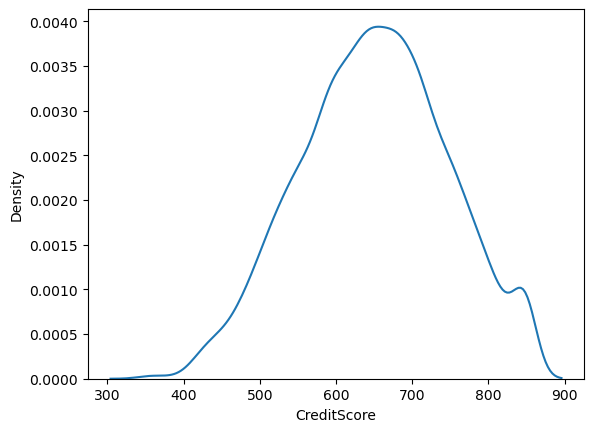

In [48]:
sns.kdeplot(df.CreditScore)

In [50]:
df['CreditScore_transformed']=np.log(df.CreditScore)

In [52]:
df.CreditScore_transformed.skew()

-0.45417386860319

In [54]:
list_3=find_outliers(df.CreditScore_transformed)
len(list_3)

23

<Axes: xlabel='CreditScore_transformed', ylabel='Density'>

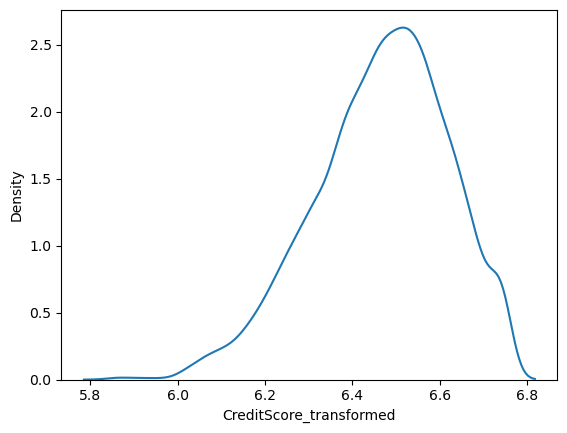

In [56]:
sns.kdeplot(df.CreditScore_transformed)

<Axes: >

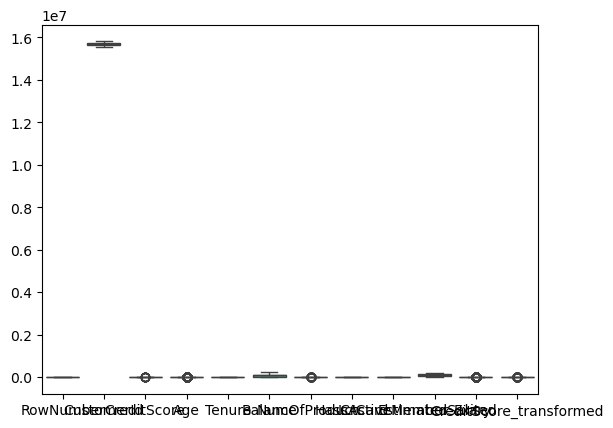

In [58]:
sns.boxplot(data=df)

Univarite Analysis
Numerical -> 

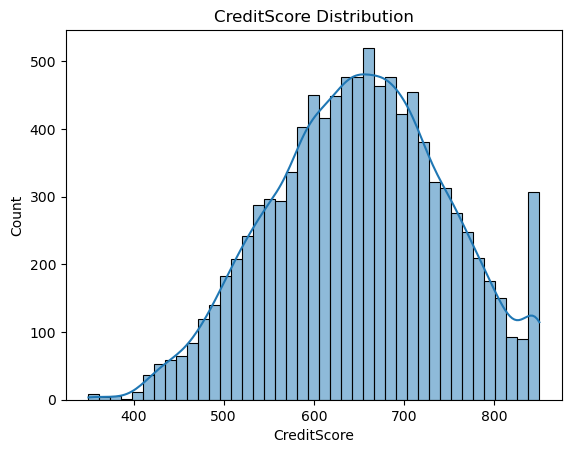

In [61]:
sns.histplot(df['CreditScore'], kde=True)
plt.title('CreditScore Distribution')
plt.show()

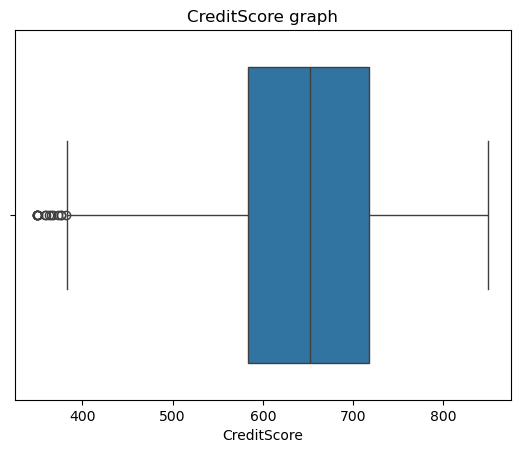

In [63]:
sns.boxplot(x=df['CreditScore'])
plt.title('CreditScore graph')
plt.show()

In [65]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

Univarite Analysis -> Categorical

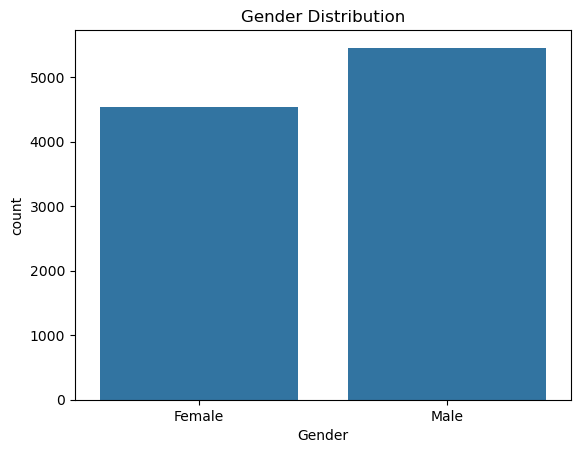

In [68]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

In [70]:
print(df['Gender'].value_counts())

Gender
Male      5457
Female    4543
Name: count, dtype: int64


Bivariate Analysis

Numerical vs Numerical

,Age,CreditScore
Age,1.000000,-0.003965
CreditScore,-0.003965,1.000000


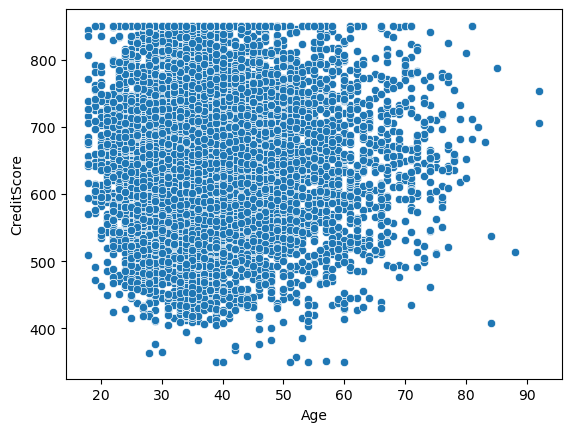

In [74]:
sns.scatterplot(x='Age', y='CreditScore', data=df)
df[['Age', 'CreditScore']].corr()

<Axes: xlabel='Gender', ylabel='Count'>

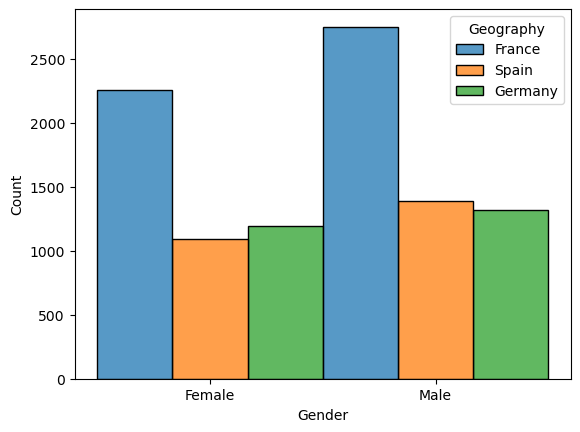

In [76]:
sns.histplot(x='Gender', hue='Geography', data=df, stat='count', multiple='dodge')

<Axes: xlabel='Gender', ylabel='Count'>

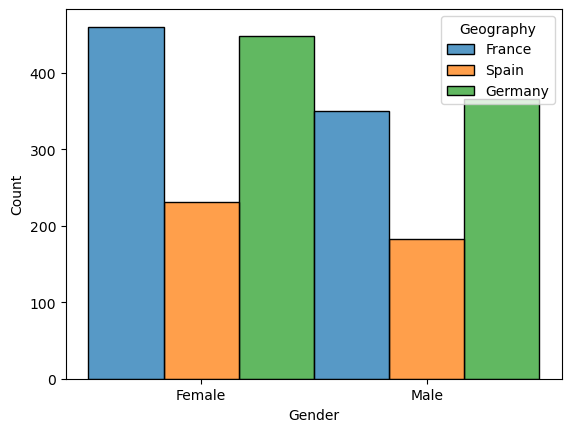

In [78]:
df_1=df.loc[df['Exited']==1]
sns.histplot(x='Gender', hue='Geography', data=df_1, stat='count', multiple='dodge')

In [80]:
df_new=df[['Gender', 'Geography', 'Exited']]

In [82]:
df_new.head()

,Gender,Geography,Exited
0,Female,France,1
1,Female,Spain,0
2,Female,France,1
3,Female,France,0
4,Female,Spain,0


In [84]:
df_new.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

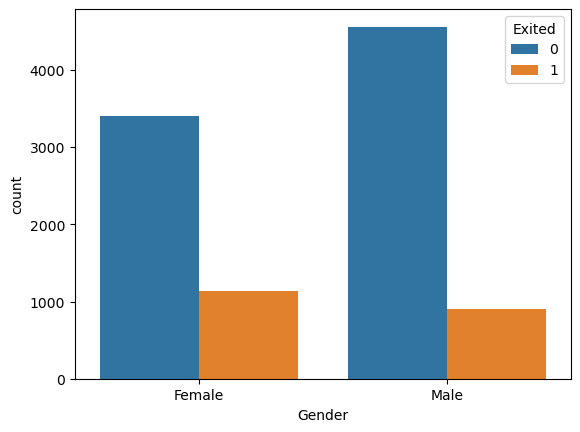

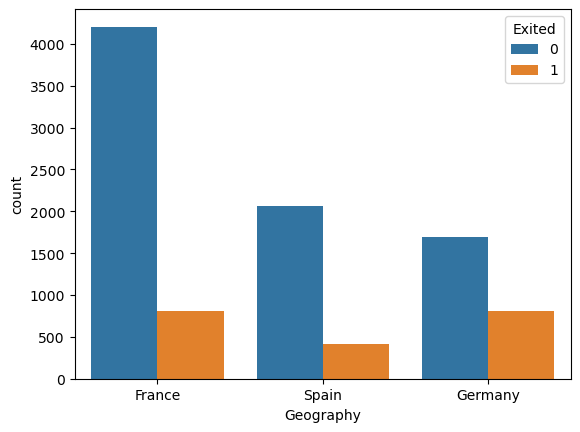

In [86]:
for i, predictor in enumerate(df_new.drop(columns=['Exited'])):
    plt.figure()
    sns.countplot(data=df_new, x=predictor, hue='Exited')

In [88]:
df.corr(numeric_only=True)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_transformed
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571,0.007185
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248,0.004760
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.995101
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.004827
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,0.000692
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.005295
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.012915
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,-0.005622
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.027199
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.002835


<Axes: >

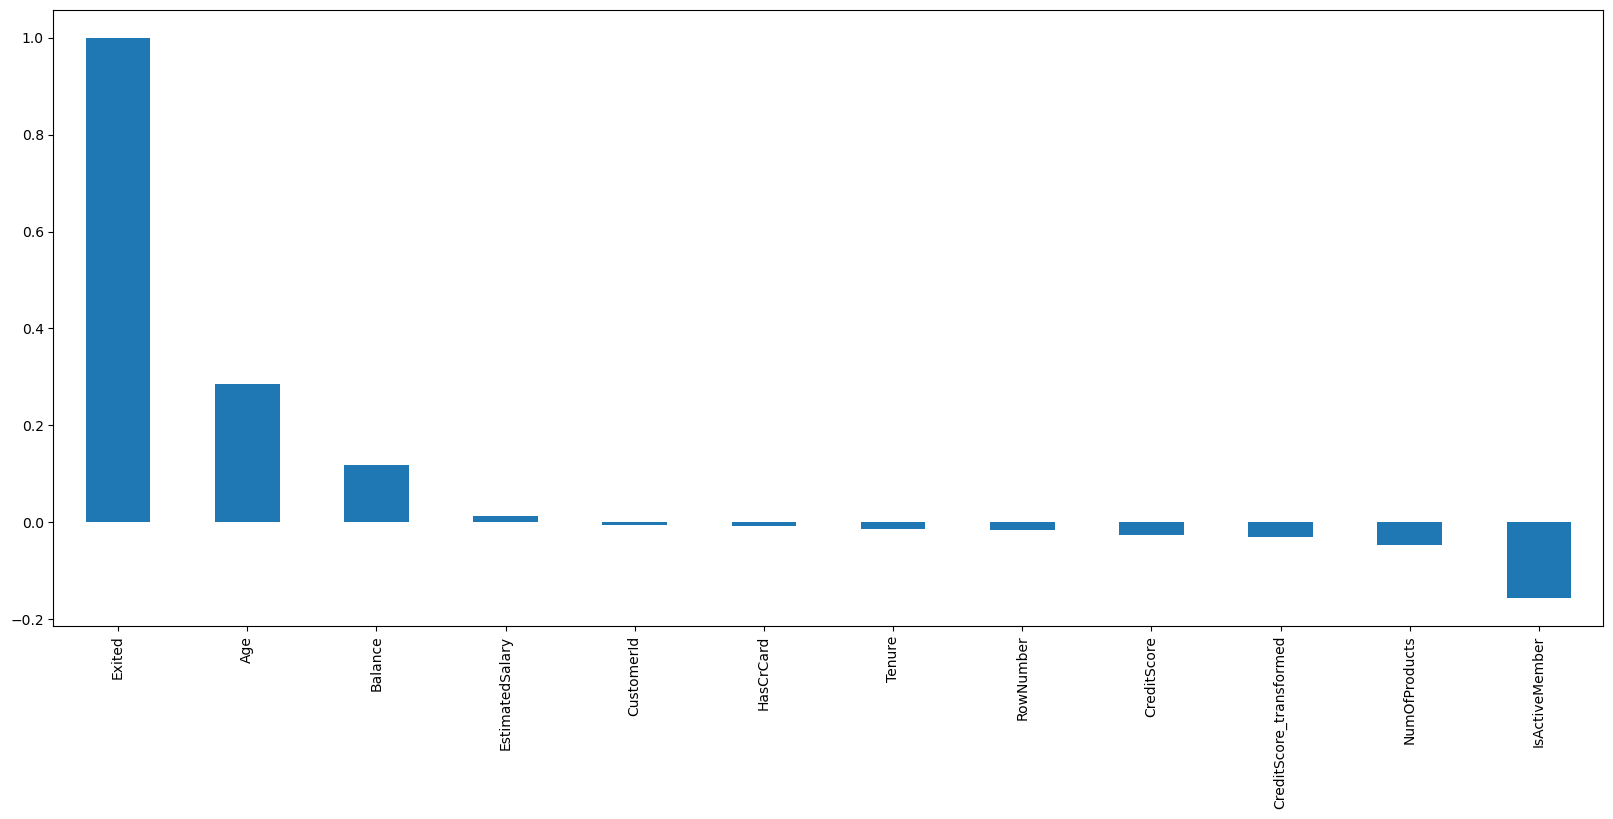

In [90]:
plt.figure(figsize=(20,8))
df.corr(numeric_only=True)['Exited'].sort_values(ascending=False).plot(kind='bar')

In [92]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


Summary Statistics:
Strategy A - Mean: 2125.00, Std Dev: 93.54, Count: 6
Strategy B - Mean: 2350.00, Std Dev: 141.42, Count: 6

T-statistic: -3.2504
P-value: 0.0105

Result: Reject the Null Hypothesis
Conclusion: There is a significant difference between the two strategies.


C:\Users\HP\AppData\Local\Temp\ipykernel_13388\2687102887.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_a, data_b], labels=['Strategy A', 'Strategy B'])


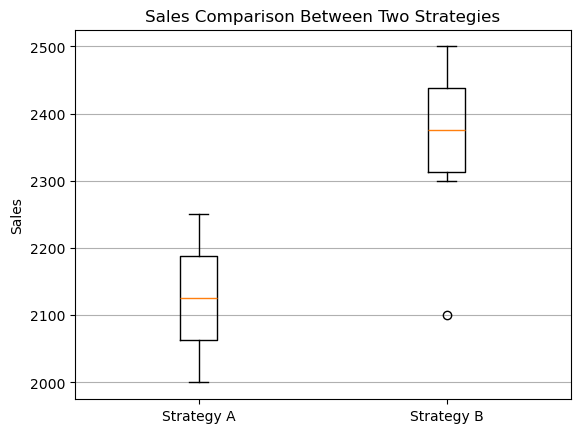

In [93]:

from scipy import stats

# Sample sales data for Strategy A and Strategy B (monthly sales)
strategy_a = [2000, 2200, 2100, 2050, 2150, 2250]
strategy_b = [2100, 2300, 2500, 2400, 2350, 2450]

# Convert to numpy arrays for convenience
data_a = np.array(strategy_a)
data_b = np.array(strategy_b)

# Summary statistics
print("Summary Statistics:")
print(f"Strategy A - Mean: {np.mean(data_a):.2f}, Std Dev: {np.std(data_a, ddof=1):.2f}, Count: {len(data_a)}")
print(f"Strategy B - Mean: {np.mean(data_b):.2f}, Std Dev: {np.std(data_b, ddof=1):.2f}, Count: {len(data_b)}\n")

# Perform independent two-sample t-test (assuming unequal variances)
t_stat, p_value = stats.ttest_ind(data_a, data_b, equal_var=False)  # Welch's t-test

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05  # Significance level

if p_value < alpha:
    print("\nResult: Reject the Null Hypothesis")
    print("Conclusion: There is a significant difference between the two strategies.")
else:
    print("\nResult: Fail to Reject the Null Hypothesis")
    print("Conclusion: No significant difference between the two strategies.")

# Visualization - Boxplot
plt.boxplot([data_a, data_b], labels=['Strategy A', 'Strategy B'])
plt.title('Sales Comparison Between Two Strategies')
plt.ylabel('Sales')
plt.grid(axis='y')
plt.show()


In [99]:
from scipy.stats import chi2_contingency
# Create contingency table
contingency_table = pd.crosstab(df['Geography'], df['Gender'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 6.918159617700976
P-value: 0.03145869671789379
